In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
u = 1.1
d = 0.5
p = 0.9
VAR = []
AVAR = []
lamb = np.arange(0,1.0001,0.0001)

In [16]:
for i in lamb:
    if i <= (1-p):
        VAR += [1-d]
        AVAR += [1-d]
    else:
        VAR += [1-u]
        AVAR += [(1-p)*(1-d)/i+(i+p-1)*(1-u)/i]

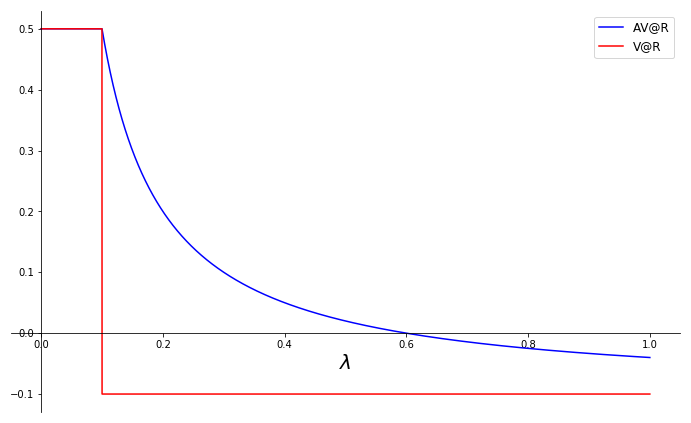

In [17]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.plot(lamb,AVAR,c='blue',label ="AV@R")
plt.plot(lamb,VAR,c='red',label = "V@R")
ax.set_aspect('equal')
ax.grid(True, which='y')
# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.legend(loc='upper right', fontsize = 12)
plt.xlabel(r'$\lambda$', size= 20)
plt.show()

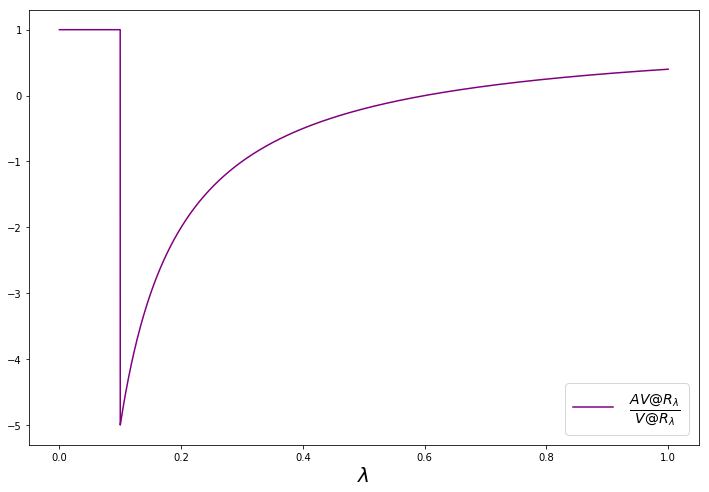

In [18]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.plot(lamb,((np.array(AVAR))/np.array(VAR)),c='purple',label =r'$\frac{AV@R_{\lambda}}{V@R_{\lambda}}$')
ax.legend(loc='lower right', fontsize = 20)
plt.xlabel(r'$\lambda$', size= 20)
plt.show()

In [19]:
from scipy.stats import binom
n = 3
pb = [0,0,0,0]
for k in range(0,n+1):
    pb[k] = binom.pmf(k, n, p)

In [20]:
s = [binom.pmf(0, n, p)]
for k in range(1,n+1):
    s += [s[-1]+binom.pmf(k, n, p)]

In [21]:
s

[0.0009999999999999994, 0.027999999999999983, 0.2709999999999999, 1.0]

In [22]:
VAR = []
AVAR = []
lamb = np.arange(0,1.0001,0.0001)
for i in lamb:
    if i <= s[0]:
        VAR += [1-d**3]
        AVAR += [1-d**3]
    elif i > s[0] and i <= s[1]:
        VAR += [1-d**2*u]
        AVAR += [((1-d**2*u)*(i-s[0])+(1-d**3)*s[0])/i]
    elif i > s[1] and i <= s[2]:
        VAR += [1-u**2*d]
        AVAR += [((1-u**2*d)*(i-s[1])+(1-d**2*u)*(s[1]-s[0])+(1-d**3)*s[0])/i]
    else:
        VAR += [1-u**3]
        AVAR += [((1-u**3)*(i-s[2])+(1-u**2*d)*(s[2]-s[1])+(1-d**2*u)*(s[1]-s[0])+(1-d**3)*s[0])/i]

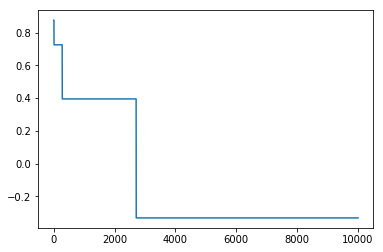

In [23]:
plt.plot(VAR)

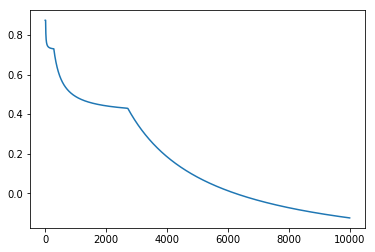

In [24]:
plt.plot(AVAR)

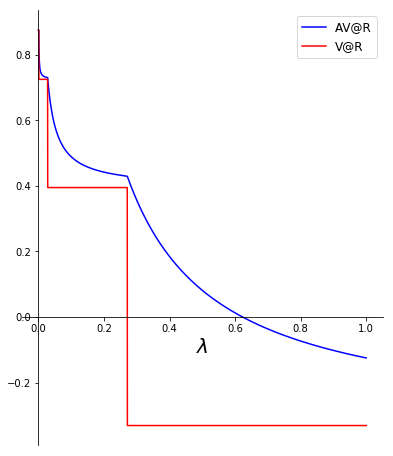

In [25]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.plot(lamb,AVAR,c='blue',label ="AV@R")
plt.plot(lamb,VAR,c='red',label = "V@R")
ax.set_aspect('equal')
ax.grid(True, which='y')
# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.legend(loc='upper right', fontsize = 12)
plt.xlabel(r'$\lambda$', size= 20)
plt.show()

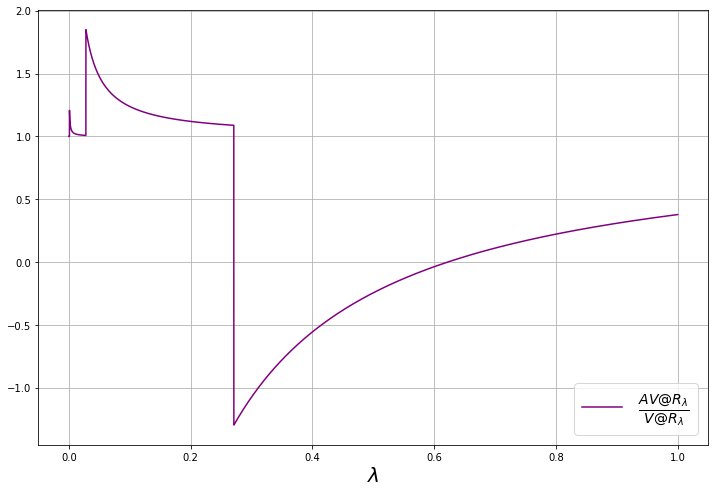

In [26]:
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt.plot(lamb,((np.array(AVAR))/np.array(VAR)),c='purple',label =r'$\frac{AV@R_{\lambda}}{V@R_{\lambda}}$')
ax.legend(loc='lower right', fontsize = 20)
plt.xlabel(r'$\lambda$', size= 20)
plt.grid(True)
plt.show()